In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geometry as geo
from scipy.spatial import Voronoi, voronoi_plot_2d

(-150.0, 150.0)

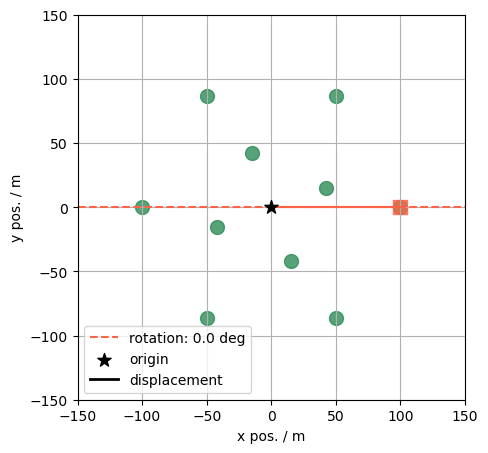

In [3]:
string_displacement = np.array([0, 0])  # displacement of center
rotation_angle = np.deg2rad(0)  # rotation angle

# set up the baseline geometry
outer_scale = 100  # distance from center to outer strings
inner_scale = outer_scale / np.sqrt(5) # it looks nice

# hexagon
hexagon = outer_scale * geo.create_symmetry(6)
# square
rot_angle = np.deg2rad(20)
square = inner_scale * geo.create_symmetry(4, starting_angle=rot_angle)

# add up
baseline_string_positions = np.concatenate([hexagon, square])

string_positions = geo.apply_transformations(
    baseline_string_positions, string_displacement, rotation_angle
)

# visualization
size = 100
color = "seagreen"
ref_color = "tomato"
plt.figure(figsize=(5, 5))
plt.scatter(string_positions[:, 0], string_positions[:, 1], s=size, c=color, alpha=0.8)
# ref string to visualize rotation:
plt.scatter(string_positions[0, 0], string_positions[0, 1], s=size, marker="s", c=ref_color, alpha=0.8)
# visualize rotation
plt.axhline(string_displacement[1], color=ref_color, ls="--")
plt.plot(
    [string_displacement[0], string_positions[0, 0]],
    [string_displacement[1], string_positions[0, 1]],
    color=ref_color,
    ls="--",
    label=f"rotation: {np.rad2deg(rotation_angle):1.1f} deg",
)
# visualize displacement of central string:
dis_color = "k"
plt.scatter(0, 0, marker="*", s=size, color=dis_color, label="origin", zorder=10)
plt.plot(
    [0, string_displacement[0]],
    [0, string_displacement[1]],
    lw=2,
    label="displacement",
    color=dis_color,
)
plt.grid()
plt.xlabel("x pos. / m")
plt.ylabel("y pos. / m")
plt.legend(loc=3)

lims = 150
plt.xlim(-lims, lims)
plt.ylim(-lims, lims)


(-120.0, 120.0)

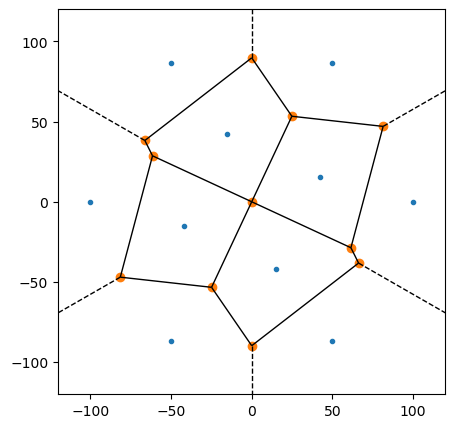

In [10]:
vr = Voronoi(baseline_string_positions)
f, ax = plt.subplots(figsize=(5, 5))
f = voronoi_plot_2d(vr, ax=ax)
lims = 120
plt.xlim(-lims, lims)
plt.ylim(-lims, lims)